<h1>Содержание<span class="tocSkip"></span></h1></span><ul class="toc-item">
</font></a></span></li></ul></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Обзор-данных" data-toc-modified-id="Обзор-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Обзор данных</a></span></li><li><span><a href="#Предоработка-данных" data-toc-modified-id="Предоработка-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Предоработка данных</a></span></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Метод-балансировки-классов-через-параметр-class_weight" data-toc-modified-id="Метод-балансировки-классов-через-параметр-class_weight-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Метод балансировки классов через параметр class_weight</a></span></li><li><span><a href="#Метод-балансировки-классов-через-upsampling" data-toc-modified-id="Метод-балансировки-классов-через-upsampling-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Метод балансировки классов через upsampling</a></span></li><li><span><a href="#Метод-балансировки-классов-через-downsampling" data-toc-modified-id="Метод-балансировки-классов-через-downsampling-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Метод балансировки классов через downsampling</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

### Обзор данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.utils import shuffle
from numpy import math

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


In [2]:
clients_churn = pd.read_csv(r"C:\datasets\Churn.csv")

In [3]:
display(clients_churn.info())
display(clients_churn.describe())
display(clients_churn.head(5))
display(clients_churn.duplicated().value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


None

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


False    10000
dtype: int64

### Предоработка данных

In [4]:
clients_churn.columns = clients_churn.columns.str.lower()#перевод названий столбцов к нижнему регистру
clients_churn = clients_churn.rename(columns = {
    'rownumber' : 'row_number', 'customerid' : 'customer_id', 'creditscore' : 'credit_score', 
    'numofproducts' : 'num_of_products', 'hascrcard' : 'has_cr_card', 'isactivemember' : 'is_active_member', 
    'estimatedsalary' : 'estimated_salary'}) #перевод названий столбцов к змеиному регистру

In [5]:
clients_churn.head(5)

,row_number,customer_id,surname,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [6]:
clients_churn['geography'].unique() #проверка на неявные дубликаты

array(['France', 'Spain', 'Germany'], dtype=object)

In [7]:
clients_churn['gender'].unique() #проверка на неявные дубликаты

array(['Female', 'Male'], dtype=object)

**Заполнение пропусков с помошью модели логистической регрессии**

In [8]:
data_reg = clients_churn.dropna() # выборка данныз для обучения модели по заполнению пропусков в столбце tenure

In [9]:
data_reg = data_reg.drop(['row_number', 'surname', 'customer_id'], axis=1) #данные столбцы не несут в себе полезной информации для алгоритма, 
#следовательно их можно исключить из датафрейма

In [10]:
data_reg = pd.get_dummies(data_reg, drop_first=True) #кодирование признаков

In [11]:
data_reg.head(5) 

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited,geography_Germany,geography_Spain,gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0


In [12]:
features = data_reg.drop(['tenure'], axis=1) #извлекаем признаки 
target = data_reg['tenure'] #извлекаем целевой признак

features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.25, random_state=12345)  #деление данных на обучающую и тестовую выборки

In [13]:
numeric = ['credit_score', 'age', 'balance', 'num_of_products', 
           'has_cr_card', 'is_active_member', 'estimated_salary'] #список столбцов с масштабируемыми признаками

scaler = StandardScaler()
features_train.loc[:, numeric] = scaler.fit_transform(features_train.loc[:, numeric]) #масштабирование признаков
features_valid.loc[:, numeric] = scaler.transform(features_valid.loc[:, numeric])

C:\anaconda\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\anaconda\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Предсказания на тренировочной выборке

In [14]:
model = LogisticRegression(random_state=12345, class_weight='balanced')
model.fit(features_train, target_train) # обучение модель на тренировочной выборке
predicted_valid = model.predict(features_valid) # прогноз на валидационной выборке
print('Accuracy модели логистической регрессии на валидационной выборке:', model.score(features_valid, target_valid))
print('f1-мера:', f1_score(target_valid, predicted_valid, average='micro'))

Accuracy модели логистической регрессии на валидационной выборке: 0.07831060272767268
f1-мера: 0.07831060272767268


Попробуем модель случайного леса. Сначала определим оптимальною глубину

In [15]:
#%%time
#best_model = None
#best_accuracy = 0
#best_depth = 0
#best_f1 = 0
#for depth in range(1, 100, 1):
#    model = RandomForestClassifier(n_estimators=20, max_depth=depth, random_state=12345, class_weight='balanced')
#   # задаем количество деревьев
#    model.fit(features_train, target_train) # обучение модели на тренирововчной выборке 
#    predictions_valid = model.predict(features_valid) #прогноз на валидационной выборке
#    accuracy_result = model.score(features_valid, target_valid) #метрика accuracy на валидационной выборке
#    f1 = f1_score(target_valid, predictions_valid, average='weighted')
#    if f1 >  best_f1:
#        best_model = model #наилучшая модель
#        best_accuracy = accuracy_result #аилучшее значение метрики accuracy на валидационной выборке
#        best_depth = depth #сохраняем наилучшее значение гиперпараметра depth на валидационной выборке
#        best_f1 = f1
#print("Глубина лучшей модели:", best_depth)              
#print("Accuracy лучшей модели:", best_accuracy)
#print("F1 лучшей модели:", best_f1)

Подбор оптимального количества деревьев:

In [16]:
#%%time
#best_model = None
#best_accuracy = 0
#best_estimators = 0
#best_f1 = 0
#for n in range(1, 100, 1):
#    model = RandomForestClassifier(n_estimators=n, max_depth= 20, random_state=12345)
#    model.fit(features_train, target_train) # обучение модели на тренирововчной выборке 
#    predictions_valid = model.predict(features_valid) #прогноз на валидационной выборке
#    accuracy_result = model.score(features_valid, target_valid) #метрика accuracy на валидационной выборке
#    f1 = f1_score(target_valid, predictions_valid, average='weighted')
#    if f1 > best_f1:
#        best_model = model# сохраняем наилучшую модель
#        best_accuracy = accuracy_result
#        best_estimators = n  
#        best_f1 = f1
#print("Количество деревьев:", best_estimators)              
#print("Accuracy лучшей модели:", best_accuracy)
#print("F1 лучшей модели:", best_f1)

In [17]:
target_valid.value_counts().sort_index() # количество значений по классам целевого признака на валидационной выборке
target_valid.value_counts().max() / target_valid.value_counts().sum() #доля большего класса

dummy_clf = DummyClassifier(random_state = 12345, strategy="most_frequent") #проверка модели на вменяемость
dummy_clf.fit(features_train, target_train)
dummy_clf.score(features_valid, target_valid)

0.10030796304443466

Точность константной модели можно считать равной доле большего класса. Точность учебных моделей выше. Проверка пройдена успешно

**Вывод:** способ заполнения пропусков с помошью ML показал себя неэффективно (логистическая регрессия и случайный лес дали около 10% верных ответов). Т к нет доказательств что пропуски неслучайны, между ними и другими признаками не прослеживается зависимость, принято решение их удалить.

 **Удаление пропусков**

In [18]:
data_reg = data_reg.dropna()

**Далее пойдет формирование выборок непосредственно для исследования задач**

In [19]:
data_reg.head(5)

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited,geography_Germany,geography_Spain,gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0


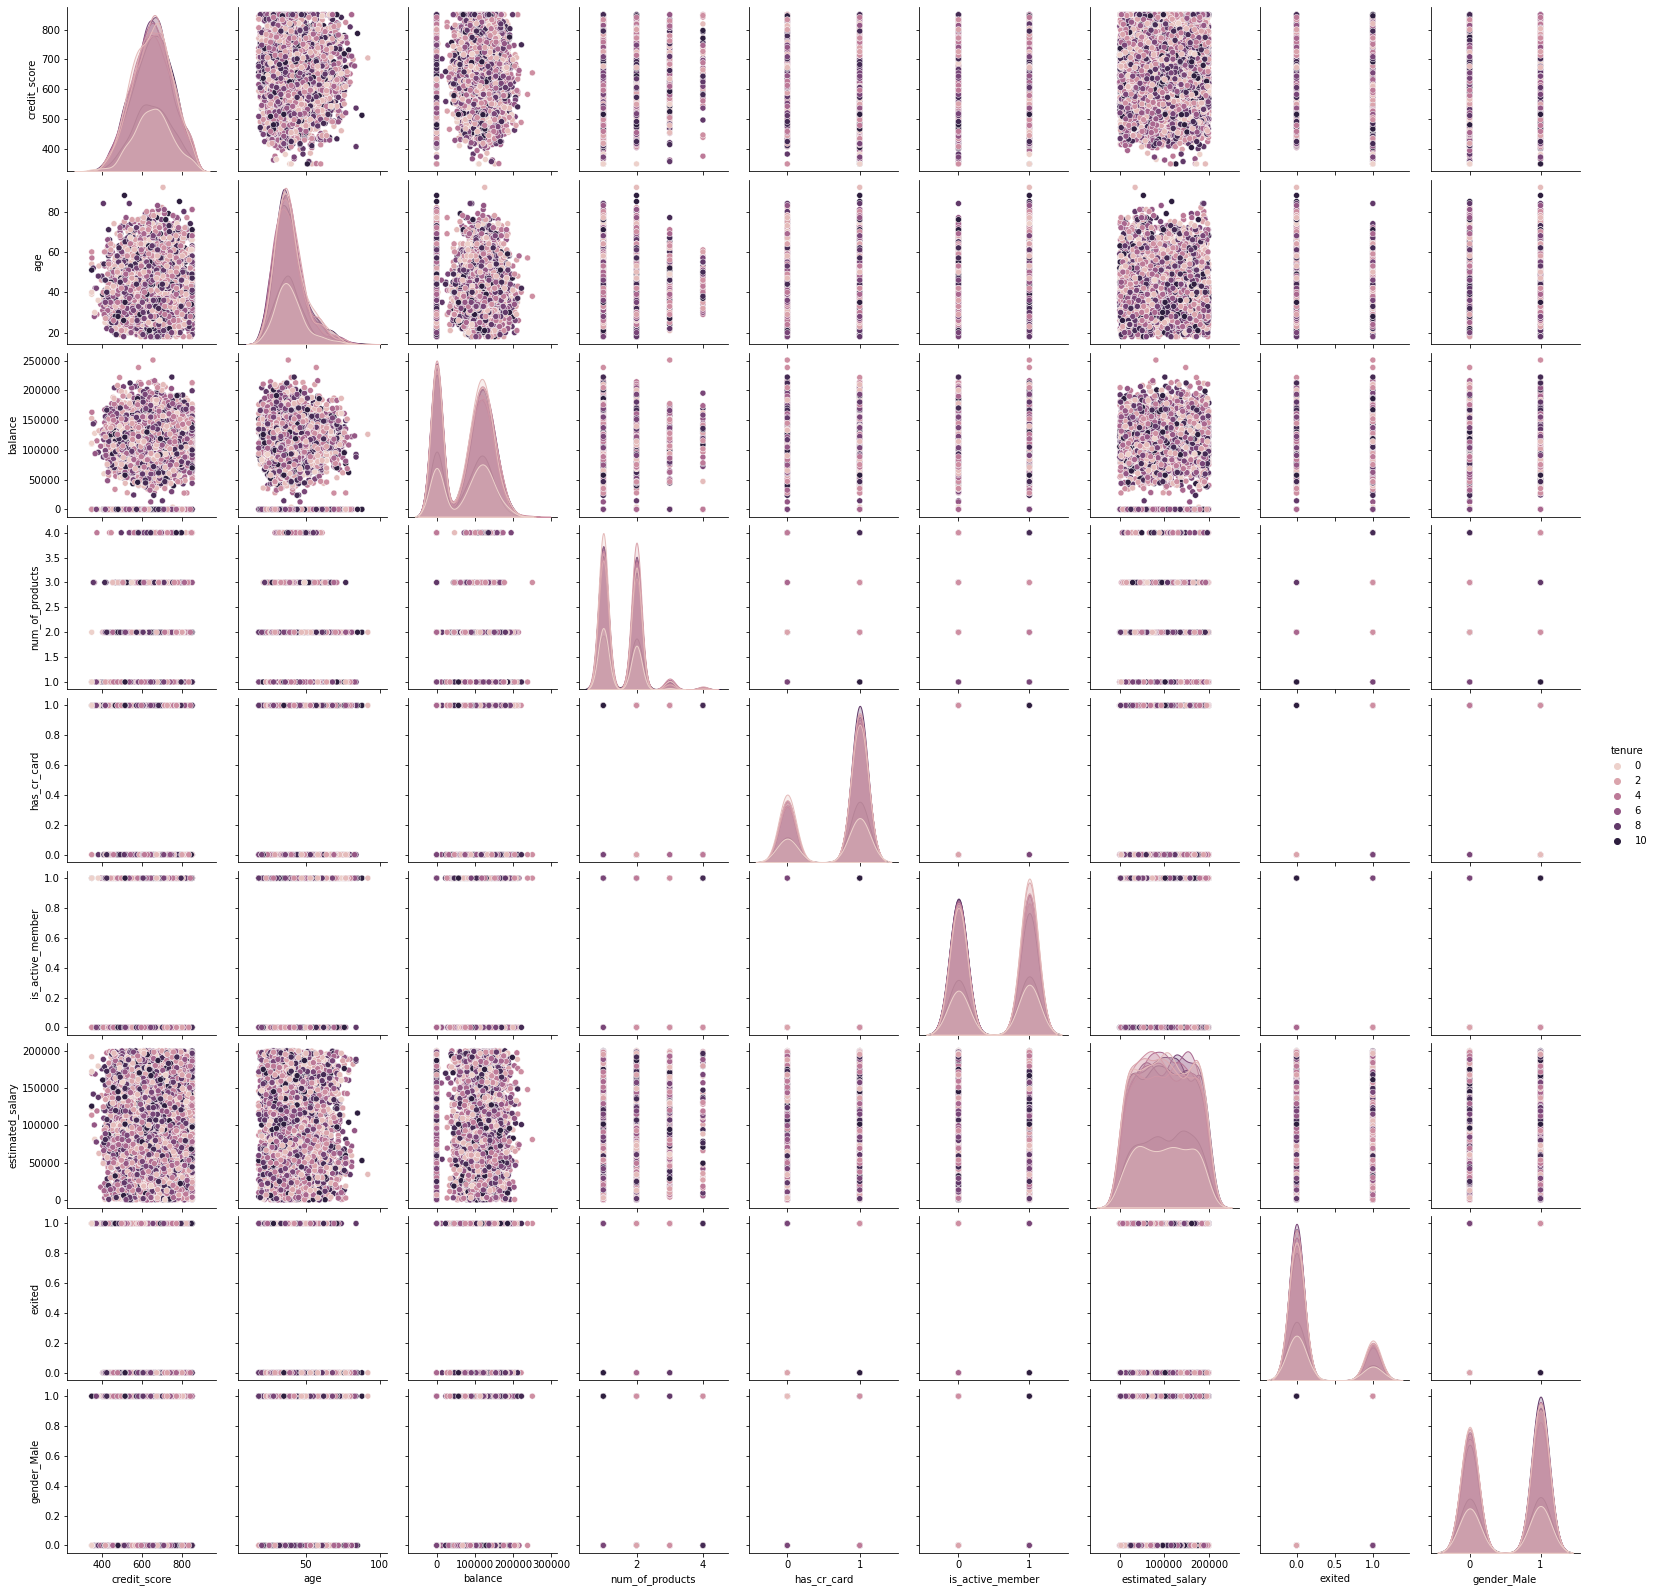

In [20]:
sns.pairplot(data_reg.drop(['geography_Germany', 'geography_Spain'], axis=1), hue='tenure')

In [21]:
features_ = data_reg.drop(['exited'], axis=1) # извлекаем признаки 
target_ = data_reg['exited']# извлекаем целевой признак

features_train_, features_test_, target_train_, target_test_ = train_test_split(
    features_, target_, test_size=0.4, random_state=12345, stratify=target_)  #деление данных на обучающую и тестовую выборки
features_test_, features_valid_, target_test_, target_valid_ = train_test_split(
    features_test_, target_test_, test_size=0.5, random_state=12345, stratify=target_test_)  #деление данных на тестовую и валидационную выборки

In [22]:
numeric_1 = ['credit_score', 'age', 'tenure', 'balance', 'num_of_products', 
           'has_cr_card', 'is_active_member', 'estimated_salary'] #список столбцов с масштабируемыми признаками

scaler = StandardScaler()
features_train_.loc[:, numeric_1] = scaler.fit_transform(features_train_.loc[:, numeric_1]) #масштабирование признаков
features_valid_.loc[:, numeric_1] = scaler.transform(features_valid_.loc[:, numeric_1])
features_test_.loc[:, numeric_1] = scaler.transform(features_test_.loc[:, numeric_1])

C:\anaconda\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [23]:
features_train_

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,geography_Germany,geography_Spain,gender_Male
9723,-1.292898,-0.660843,0.686341,0.786636,-0.910943,-1.554765,-1.036226,-0.223548,0,0,1
1224,-1.563714,0.778434,1.034232,0.833795,-0.910943,0.643184,-1.036226,1.383021,0,1,0
8377,1.581914,0.106771,-0.357331,-1.222967,0.789359,0.643184,0.965040,-0.308331,0,1,1
8014,0.842379,0.010820,-1.053112,0.807063,-0.910943,0.643184,0.965040,-0.430980,0,1,0
2491,-0.397123,-1.236554,-0.357331,-1.222967,0.789359,0.643184,0.965040,1.392642,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
3891,0.759051,-1.044650,-0.009440,0.248750,-0.910943,0.643184,-1.036226,0.761788,1,0,0
2675,0.988203,-0.085132,-0.009440,-0.180942,0.789359,0.643184,0.965040,0.704706,1,0,1
4217,-0.657523,-0.372988,-0.009440,0.727784,-0.910943,0.643184,0.965040,-1.323749,1,0,1
5817,-0.386707,2.889373,1.382122,0.038092,-0.910943,-1.554765,0.965040,-1.579750,1,0,1


## Исследование задачи

Модель логистической регрессии (без балансировки)

In [24]:
# model = LogisticRegression(random_state=12345)
# model.fit(features_train_, target_train_) #обучение модели на тренировочной выборке
# predicted_valid_ = model.predict(features_valid_) #прогноз на валидационной выборке
# print('Accuracy модели логистической регрессии на валидационной выборке:', model.score(features_valid_, target_valid_))
# print('f1-мера:', f1_score(target_valid_, predicted_valid_))

In [25]:
# model = LogisticRegressionCV(random_state=12345, cv=5)
# model.fit(features_train_, target_train_) #обучение модели на тренировочной выборке
# predicted_valid_ = model.predict(features_valid_) #прогноз на валидационной выборке
# print('Accuracy модели логистической регрессии на валидационной выборке:', model.score(features_valid_, target_valid_))
# print('f1-мера:', f1_score(target_valid_, predicted_valid_))

Модель случайного леса (без балансировки). Подбор гиперпараметров.

In [26]:
# %%timeit
# best_model = None
# best_accuracy = 0
# best_estimators = 0
# best_depth = 0
# best_f1 = 0
# for n in range(1, 100, 10):
#     for depth in range(1, 100):
#         model = RandomForestClassifier(n_estimators=n, max_depth=depth, random_state=12345) 
#         model.fit(features_train_, target_train_) # обучение модели на тренирововчной выборке # расчет качества модели на тренировочной выборке
#         predictions_valid_ = model.predict(features_valid_)
#         accuracy_result = model.score(features_valid_, target_valid_)
#         f1 = f1_score(target_valid_, predictions_valid_)
#         if f1 >  best_f1:
#             best_model = model #сохраняем наилучшую модель
#             best_accuracy = accuracy_result #сохраняем наилучшее значение метрики accuracy на тренировочных данных
#             best_depth = depth #сохраняем наилучшее значение гиперпараметра depth на тренировочных данных
#             best_f1 = f1
#             best_estimators = n          
# print("Глубина лучшей модели:", best_depth)
# print("Количество деревьев:", best_estimators)
# print("Accuracy лучшей модели:", best_accuracy)
# print("F1 лучшей модели:", best_f1)
# print (np.mean(cross_val_score(best_model, features_train_, target_train_, cv=10)))

**Вывод:** Наиболее эффективной моделью показал себя случайный лес с F1-мерой = 0.59 и accuracy = 0.87

## Борьба с дисбалансом

### Метод балансировки классов через параметр class_weight

Модель логистической регрессии

In [27]:
# best_model = 0
# best_accuracy = 0
# best_f1 = 0
# for c in np.arange(0.1, 10, 0.1):
#     model = LogisticRegression(random_state=12345, class_weight='balanced', solver="liblinear", C=c)
#     model.fit(features_train_, target_train_) #обучение модель на тренировочной выборке
#     predicted_valid_ = model.predict(features_valid_) #прогноз на валидационной выборке
#     accuracy_result = model.score(features_valid_, target_valid_)
#     f1 = f1_score(target_valid_, predicted_valid_)  
#     if f1 > best_f1:
#         best_model = model #наилучшая модель
#         best_f1 = f1 #лучшее значение гармонического среднего
#         best_accuracy = accuracy_result #наилучшее значение метрики accuracy на валидационных данных
# print(model)
# print("Accuracy лучшей модели:", best_accuracy)
# print("F1 лучшей модели:", best_f1)

LogisticRegression(C=9.9, class_weight='balanced', random_state=12345,
                   solver='liblinear')
Accuracy лучшей модели: 0.7207256734469488
F1 лучшей модели: 0.5096525096525096


Модель случайного леса

In [28]:
# %%time
# best_model_rfc = None
# best_accuracy = 0
# best_estimators = 0
# best_depth = 0
# best_f1 = 0
# for n in range(1, 100, 10):
#     for depth in range(1, 100):
#         model = RandomForestClassifier(n_estimators=n, max_depth=depth, random_state=12345, class_weight='balanced')
#         model.fit(features_train_, target_train_)
#         predictions_valid_ = model.predict(features_valid_)
#         accuracy_result = model.score(features_valid_, target_valid_)
#         f1 = f1_score(target_valid_, predictions_valid_)
#         if f1 > best_f1:
#             best_model_rfc = model#наилучшая модель
#             best_accuracy = accuracy_result #наилучшее значение метрики accuracy на валидационных данных
#             best_estimators = n  #оптимальное количество деревьев
#             best_f1 = f1 #лучшее значение гармонического среднего
#             best_depth = depth #сохраняем наилучшее значение гиперпараметра depth на тренировочных данных
# print("Глубина лучшей модели:", best_depth)         
# print("Количество деревьев:", best_estimators)              
# print("Accuracy лучшей модели:", best_accuracy)
# print("F1 лучшей модели:", best_f1)

### Метод балансировки классов через upsampling

In [29]:
def upsample(features, target): #функция балансировки 
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    repeat_features = math.ceil(len(features_zeros) / len(features_ones))
    repeat_target = math.ceil(len(target_zeros) / len(target_ones))

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat_features)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat_target)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

features_train_upsampled, target_train_upsampled = upsample(features_train_, target_train_)

Модель логистической регрессии

In [30]:
# model = LogisticRegression(random_state=12345)
# model.fit(features_train_upsampled, target_train_upsampled) #обучение модель на тренировочной выборке
# predicted_valid_ = model.predict(features_valid_) #прогноз на валидационной выборке
# print('Accuracy модели логистической регрессии на валидационной выборке:', model.score(features_valid_, target_valid_))
# print('f1-мера:', f1_score(target_valid_, predicted_valid_))

Модель случайного леса

In [31]:
# %%time
# best_model = None
# best_accuracy = 0
# best_estimators = 0
# best_depth = 0
# best_f1 = 0
# for n in range(1, 100, 10):
#     for depth in range(1, 100):
#         model = RandomForestClassifier(n_estimators=n, max_depth= depth, random_state=12345)
#         model.fit(features_train_upsampled, target_train_upsampled)
#         predictions_valid_ = model.predict(features_valid_)
#         accuracy_result = model.score(features_valid_, target_valid_)
#         f1 = f1_score(target_valid_, predictions_valid_)
#         if f1 > best_f1:
#             best_model = model #наилучшая модель
#             best_accuracy = accuracy_result #наилучшее значение метрики accuracy на валидационных данных
#             best_estimators = n  #оптимальное количество деревьев
#             best_f1 = f1 #лучшее значение гармонического среднего
#             best_depth = depth #сохраняем наилучшее значение гиперпараметра depth на валидационных данных
# print("Глубина лучшей модели:", best_depth)            
# print("Количество деревьев:", best_estimators)              
# print("Accuracy лучшей модели:", best_accuracy)
# print("F1 лучшей модели:", best_f1)

### Метод балансировки классов через downsampling

In [32]:
def downsample(features, target): #функция балансировки 
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    rat_features = math.ceil(len(features_ones) / len(features_zeros))
    rat_target = math.ceil(len(target_ones) / len(target_zeros))
    
    features_downsampled = pd.concat(
        [features_zeros.sample(frac=rat_features, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=rat_target, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train_, target_train_)

Модель логистической регрессии

In [33]:
# model = LogisticRegression(random_state=12345)
# model.fit(features_downsampled, target_downsampled) #обучение модель на тренировочной выборке
# predicted_valid_ = model.predict(features_valid_) #прогноз на валидационной выборке
# print('Accuracy модели логистической регрессии на валидационной выборке:', model.score(features_valid_, target_valid_))
# print('f1-мера:', f1_score(target_valid_, predicted_valid_))

Модель случайного леса

In [34]:
# %%time
# best_model = None
# best_accuracy = 0
# best_estimators = 0
# best_f1 = 0
# best_depth  = 0
# for n in range(1, 100, 10):
#     for depth in range(1, 100):
#         model = RandomForestClassifier(n_estimators=n, max_depth=depth, random_state=12345)
#         model.fit(features_downsampled, target_downsampled)
#         predictions_valid_ = model.predict(features_valid_)
#         accuracy_result = model.score(features_valid_, target_valid_)
#         f1 = f1_score(target_valid_, predictions_valid_)
#         if f1 > best_f1:
#             best_model = model #наилучшая модель
#             best_accuracy = accuracy_result #наилучшее значение метрики accuracy на валидационных данных
#             best_estimators = n  #оптимальное количество деревьев
#             best_f1 = f1 #лучшее значение гармонического среднего
#             best_depth = depth #сохраняем наилучшее значение гиперпараметра depth на валидационных данных
# print("Глубина лучшей модели:", best_depth)              
# print("Количество деревьев:", best_estimators)              
# print("Accuracy лучшей модели:", best_accuracy)
# print("F1 лучшей модели:", best_f1)

**Вывод:** наилучшим себя показал метод взвешивания классов. F1 лучшей модели: 0.617

Подбор параметров лучшей модели случайного леса через `GridSearchCV`

In [35]:
#%%time
#model_rfc = RandomForestClassifier(class_weight='balanced')
#parametrs = { 'n_estimators': range (1, 100, 10),  #число деревьев в лесу
#              'max_depth': range (1, 100, 10),    #глубина дерева
#              'min_samples_leaf': range (1, 8, 2),    #минимальное число образцов в листах
#              'min_samples_split': range (2, 10, 2) } #минимальное число образцов для сплита
#
#grid = GridSearchCV(model_rfc, parametrs, cv=5, n_jobs=-1)
#grid.fit(features_train_, target_train_)

#predictions_valid_ = model.predict(features_valid_)             
#print("Accuracy лучшей модели:", model.score(features_valid_, target_valid_))
#print("F1 лучшей модели:", f1_score(target_valid_, predictions_valid_))

Подбор параметров лучшей модели случайного леса через `RandomizedSearchCV`

In [36]:
# %%time
# model_rscv = RandomForestClassifier(class_weight='balanced')
# param_dict = { 'n_estimators': range (100, 1000, 10),  #число деревьев в лесу
#               'max_depth': range (1, 100, 10),    #глубина дерева
#               'min_samples_leaf': range (1, 8, 2),    #минимальное число образцов в листах
#               'min_samples_split': range (2, 10, 2),  #минимальное число образцов для сплита
#               'bootstrap': [True, False],
#               'max_features': ['log2', 'sqrt']} 

# rand_search = RandomizedSearchCV(
#     model_rscv, param_dict, cv=5, n_jobs=-1, n_iter=100,  random_state=0)

# rand_search.fit(features_train_, target_train_)
# rand_search.best_params_

Расчет метрик лучшей модели случайного леса по RandomizedSearch

In [37]:
model_rscv = RandomForestClassifier(n_estimators=950, max_depth= 61, min_samples_split=4, min_samples_leaf=1, bootstrap=True, max_features='log2', random_state=12345, class_weight='balanced')
model_rscv.fit(features_train_, target_train_)
predictions_valid_ = model_rscv.predict(features_valid_)
        
print("Accuracy:", model_rscv.score(features_valid_, target_valid_))
print("F1:", f1_score(target_valid_, predictions_valid_))

Accuracy: 0.8642111050027488
F1: 0.5944170771756979


## Тестирование модели

Тестирование лучшей модели случайного леса

In [38]:
%%time
best_model_rfc = RandomForestClassifier(n_estimators=71, max_depth= 12, random_state=12345, class_weight='balanced')
best_model_rfc.fit(features_train_, target_train_)
predictions_test_ = best_model_rfc.predict(features_test_)
accuracy_result = best_model_rfc.score(features_test_, target_test_)
f1 = f1_score(target_test_, predictions_test_)   
              
print("Accuracy лучшей модели:", accuracy_result)
print("F1 лучшей модели:", f1)

Accuracy лучшей модели: 0.8564356435643564
F1 лучшей модели: 0.6133333333333333
Wall time: 432 ms


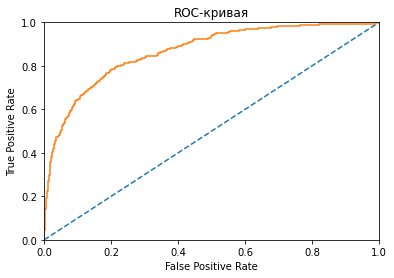

0.8668385375821712

In [42]:
probabilities_test = best_model_rfc.predict_proba(features_test_)
predictions_test_one = probabilities_test[:, 1]
fpr, tpr, thresholds = roc_curve(target_test_, predictions_test_one)
auc_roc = roc_auc_score(target_test_ , predictions_test_one)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')

plt.show()
display(auc_roc)

**Финальный вывод:** в проекте "Отток клиентов из банка" был сделан упор на две модели: модель логистической регрессиии и модель случайного леса. Лучшей себя показала модель случайного леса как при подборе параметров, так и на тестовой выборке. 
Основные метрики качества модели случайного леса на тестовой выборке: 
- Accuracy лучшей модели: 0.863 - доля верных ответов предсказанных моделью
- F1 лучшей модели: 0.636 - среднее гармоническое (качество прогноза положительного класса)  
- Auc_roc составил 0.868 - доля верных ответов модели (или площадь под кривой)

На графике ROC-кривая хорошо видно на сколько кривая нашей модели поднимается над "кривой" случайной модели (пунктирная линия на графике показывает предсказания случайной модели). Разность их площадей 0.86-0.5= 0.36. На 36% наша модель эффективнее случайной и в 86% случаев дает верный результат. 

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке исполнения
- [ ]  Выполнен шаг 1: данные подготовлены
- [ ]  Выполнен шаг 2: задача исследована
    - [ ]  Исследован баланс классов
    - [ ]  Изучены модели без учёта дисбаланса
    - [ ]  Написаны выводы по результатам исследования
- [ ]  Выполнен шаг 3: учтён дисбаланс
    - [ ]  Применено несколько способов борьбы с дисбалансом
    - [ ]  Написаны выводы по результатам исследования
- [ ]  Выполнен шаг 4: проведено тестирование
- [ ]  Удалось достичь *F1*-меры не менее 0.59
- [ ]  Исследована метрика *AUC-ROC*